# Taller de Análisis de Datos: Predicción de Fuga de Clientes (Churn) en TelecomX


# ⚙️ 1. Configuración Inicial

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 📌 2. Extracción

In [2]:
# Extraemos los datos desde la fuente original (JSON anidado)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
print("Datos extraídos correctamente.")

Datos extraídos correctamente.


# 🔧 3. Transformación

In [3]:
# Normalizamos el JSON anidado para convertirlo en un DataFrame plano.
from pandas import json_normalize
df = json_normalize(data, sep='_')

# Renombramos las columnas segun el diccionario entregado
df.rename(columns={
    'customer_gender': 'gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'Charges.Monthly',
    'account_Charges_Total': 'Charges.Total'
}, inplace=True)


df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
print("Transformación inicial completada. Columnas renombradas y tipos de datos ajustados.")
df.head()

Transformación inicial completada. Columnas renombradas y tipos de datos ajustados.


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# 📊 4. Carga

In [4]:
# Guardamos el DataFrame limpio en formatos comunes para su uso futuro.
df.to_csv('telecom_data_limpio.csv', index=False)
df.to_json('telecom_data_limpio.json', orient='records', indent=4)
print("Archivos 'telecom_data_limpio.csv' y 'telecom_data_limpio.json' guardados.")

Archivos 'telecom_data_limpio.csv' y 'telecom_data_limpio.json' guardados.


# 📈 5. Análisis Exploratorio de Datos (EDA)

Ahora que tenemos los datos limpios y estructurados, ¡comienza la diversión! Vamos a explorar los datos para encontrar insights.

### 5.1. Vistazo General y Limpieza Adicional

In [5]:
# df.info() nos da un resumen de las columnas, sus tipos y si tienen valores nulos.
print("Información general del DataFrame:")
df.info()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contrac

Observamos que la columna `Charges.Total` tiene valores nulos. Vamos a investigar por qué.

In [6]:
# Filtramos el DataFrame para ver las filas donde 'Charges.Total' es nulo.
nulos = df[df['Charges.Total'].isnull()]
print(f"Se encontraron {len(nulos)} filas con 'Charges.Total' nulo.")
nulos[['customerID', 'tenure', 'Charges.Monthly', 'Charges.Total']]

Se encontraron 11 filas con 'Charges.Total' nulo.


,customerID,tenure,Charges.Monthly,Charges.Total
975,1371-DWPAZ,0,56.05,NaN
1775,2520-SGTTA,0,20.00,NaN
1955,2775-SEFEE,0,61.90,NaN
2075,2923-ARZLG,0,19.70,NaN
2232,3115-CZMZD,0,20.25,NaN
2308,3213-VVOLG,0,25.35,NaN
2930,4075-WKNIU,0,73.35,NaN
3134,4367-NUYAO,0,25.75,NaN
3203,4472-LVYGI,0,52.55,NaN
4169,5709-LVOEQ,0,80.85,NaN


**Insight:** Los clientes con `Charges.Total` nulo son aquellos que tienen una antigüedad (`tenure`) de 0 meses. Son clientes nuevos que aún no han completado su primer mes, por lo que su cargo total es cero. La forma correcta de manejar esto es rellenar los valores nulos con 0.

In [7]:
# Rellenamos los valores nulos en 'Charges.Total' con 0
df['Charges.Total'].fillna(0, inplace=True)

# Verificamos que ya no hay valores nulos
print("Suma de valores nulos después de la limpieza:")
df.isnull().sum()

Suma de valores nulos después de la limpieza:


C:\Users\Dante\AppData\Local\Temp\ipykernel_21200\727601514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(0, inplace=True)


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

También vemos que la columna `Churn` tiene valores que no son 'Yes' o 'No'. Vamos a corregirlo.

In [8]:
print("Valores únicos en la columna 'Churn' antes de la limpieza:")
print(df['Churn'].unique())

# Mantenemos solo las filas donde Churn es 'Yes' o 'No'. Los valores en blanco no nos sirven.
df = df[df['Churn'].isin(['Yes', 'No'])]

print("\nValores únicos en la columna 'Churn' después de la limpieza:")
print(df['Churn'].unique())

Valores únicos en la columna 'Churn' antes de la limpieza:
['No' 'Yes' '']

Valores únicos en la columna 'Churn' después de la limpieza:
['No' 'Yes']


### 5.2. Análisis Univariado

Analizamos cada variable de forma individual para entender su distribución.

C:\Users\Dante\AppData\Local\Temp\ipykernel_21200\2232380757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='pastel')


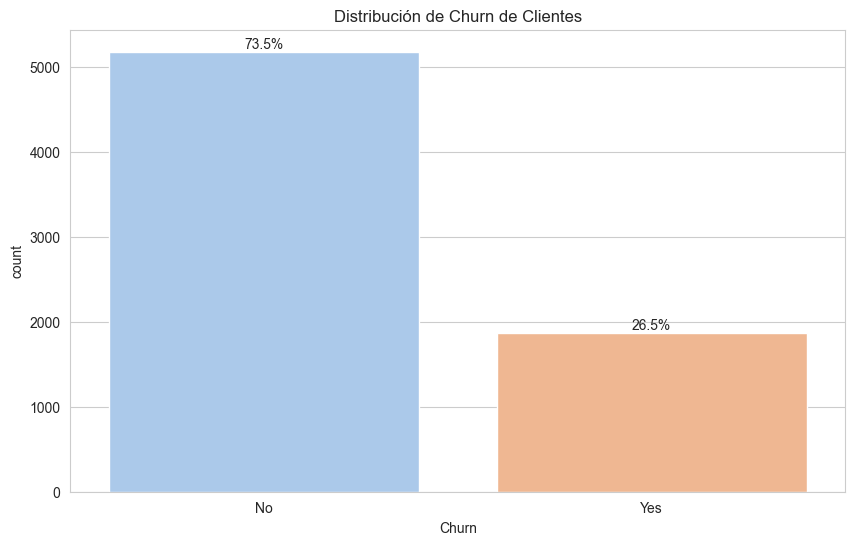

In [9]:
# ¿Cuál es la proporción de clientes que cancelan (Churn)?
plt.title('Distribución de Churn de Clientes')
ax = sns.countplot(x='Churn', data=df, palette='pastel')

# Añadir porcentajes en las barras
total = len(df['Churn'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

**Insight:** Aproximadamente el 26.5% de los clientes en este dataset han cancelado su servicio. Esta es nuestra variable objetivo.

In [ ]:
# ¿Cómo se distribuye la antigüedad (tenure) de los clientes?
plt.title('Distribución de la Antigüedad (Tenure) de los Clientes')
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Número de Clientes')
plt.show()

**Insight:** Hay dos grandes grupos de clientes: un grupo grande de clientes muy nuevos (1-2 meses) y otro grupo de clientes muy leales (más de 70 meses).

In [ ]:
# Veamos la distribución de algunas variables categóricas importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribución de Características de los Clientes', fontsize=16)

sns.countplot(ax=axes[0, 0], x='Contract', data=df, palette='viridis').set_title('Tipo de Contrato')
sns.countplot(ax=axes[0, 1], x='InternetService', data=df, palette='plasma').set_title('Tipo de Servicio de Internet')
sns.countplot(ax=axes[1, 0], x='PaymentMethod', data=df, palette='magma').set_title('Método de Pago')
sns.countplot(ax=axes[1, 1], x='SeniorCitizen', data=df, palette='cividis').set_title('Cliente Mayor (Senior Citizen)')

# Rotar etiquetas para que no se solapen
axes[1, 0].tick_params(axis='x', rotation=30)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 5.3. Análisis Bivariado

Ahora, cruzamos variables para ver cómo se relacionan con el `Churn`.

In [ ]:
# ¿Cómo afecta el tipo de contrato al Churn?
plt.title('Tasa de Churn por Tipo de Contrato')
sns.countplot(x='Contract', hue='Churn', data=df, palette='inferno')
plt.show()

# Veamoslo en porcentajes para que sea más claro
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar', stacked=True, color=['#3a5e8c', '#ff6f61'])
plt.title('Porcentaje de Churn por Tipo de Contrato')
plt.ylabel('Proporción de Clientes')
plt.xticks(rotation=0)
plt.show()

**Insight Clave:** Los clientes con contrato `Month-to-month` (mes a mes) tienen una tasa de cancelación muchísimo más alta que los clientes con contratos anuales. ¡Este es un factor predictivo muy fuerte!

In [ ]:
# ¿Cómo afecta la antigüedad (tenure) al Churn?
plt.title('Distribución de Antigüedad por Estado de Churn')
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.show()

**Insight Clave:** Los clientes que cancelan (`Yes`) tienen una antigüedad mediana mucho menor que los que no cancelan. Esto confirma que los clientes más nuevos son los más propensos a irse.

In [ ]:
# ¿Y los cargos mensuales?
plt.title('Distribución de Cargos Mensuales por Estado de Churn')
sns.boxplot(x='Churn', y='Charges.Monthly', data=df, palette='spring')
plt.show()

**Insight Clave:** Los clientes que cancelan tienden a tener cargos mensuales más altos. Esto podría indicar que los precios altos son un motivo de cancelación.

In [ ]:
# ¿El tipo de servicio de internet influye?
pd.crosstab(df['InternetService'], df['Churn'], normalize='index').plot(kind='bar', stacked=True, color=['#4caf50', '#f44336'])
plt.title('Porcentaje de Churn por Servicio de Internet')
plt.ylabel('Proporción de Clientes')
plt.xticks(rotation=0)
plt.show()

**Insight Clave:** Los clientes con **Fibra Óptica** tienen una tasa de churn mucho más alta que los de DSL o los que no tienen internet. Esto podría deberse a problemas de estabilidad del servicio, un precio más alto, o expectativas no cumplidas.

### 5.4. Análisis Multivariado

Exploramos la relación entre las variables numéricas.

In [ ]:
# Creemos un mapa de calor para ver la correlación entre las variables numéricas.
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

plt.title('Mapa de Calor de Correlación de Variables Numéricas')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**Insights:**
- `tenure` y `Charges.Total` están fuertemente correlacionados (0.83), lo cual es lógico: a más tiempo como cliente, más has gastado en total.
- `Charges.Monthly` y `Charges.Total` también tienen una correlación positiva fuerte (0.65).
- No hay otras correlaciones extremadamente altas que sugieran problemas de multicolinealidad si quisiéramos construir un modelo de machine learning.

# 📄 6. Informe Final y Conclusiones

Tras realizar el análisis exploratorio de los datos de TelecomX, hemos identificado varios factores clave que se asocian con una mayor probabilidad de que un cliente cancele su servicio (`Churn`). Estos hallazgos son cruciales para que la empresa pueda diseñar estrategias de retención efectivas.

### Perfil del Cliente Propenso a Cancelar:

1.  **Tipo de Contrato:** El factor más determinante es el contrato **mes a mes**. Los clientes sin un compromiso a largo plazo son significativamente más propensos a irse. 
    - **Recomendación:** Incentivar la migración a contratos de 1 o 2 años mediante descuentos o beneficios adicionales.

2.  **Antigüedad (Tenure):** Los **clientes nuevos** (con pocos meses de antigüedad) tienen un riesgo de churn mucho mayor. El primer par de meses es un período crítico para la retención.
    - **Recomendación:** Implementar un programa de *onboarding* para nuevos clientes, asegurando que su experiencia inicial sea excelente y que entiendan el valor de los servicios contratados.

3.  **Servicio de Internet:** Los clientes con **Fibra Óptica** muestran una tasa de cancelación alarmantemente alta en comparación con los de DSL. 
    - **Recomendación:** Investigar la causa raíz. ¿Es el precio? ¿La estabilidad del servicio? ¿El soporte técnico para este servicio es deficiente? Una encuesta de satisfacción enfocada en estos clientes podría revelar el problema.

4.  **Cargos Mensuales:** Clientes con **facturas mensuales más altas** tienden a cancelar más. 
    - **Recomendación:** Revisar la estructura de precios, especialmente para paquetes de alto valor. Ofrecer paquetes personalizados o descuentos por lealtad podría mitigar este efecto.

5.  **Servicios Adicionales:** Aunque no se exploró en profundidad con gráficos, un análisis más detallado (usando `crosstab`) mostraría que los clientes sin servicios de valor añadido como `OnlineSecurity`, `OnlineBackup` y `TechSupport` son más propensos a cancelar. Estos servicios generan "enganche" (stickiness).
    - **Recomendación:** Promocionar activamente estos servicios adicionales, quizás ofreciendo el primer mes gratis, para aumentar la dependencia del cliente en el ecosistema de la empresa.